# 决策边界

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# 我们知道逻辑回归是解决2分类问题的，但鸢尾花数据集有4个分类，所以我们需要只取其中2个分类
# 另外为了可视化，我们只取其中2个特征而不是全部特征
X = X[y<2,:2]
y = y[y<2]
X.shape, y.shape

((100, 2), (100,))

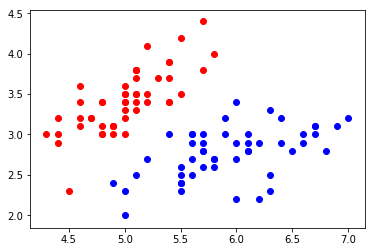

In [4]:
# 分类0的散点图
plt.scatter(X[y==0,0], X[y==0,1], color='red')

# 分类1的散点图
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

## 使用我们自己编写的逻辑回归

In [5]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [6]:
from playML.logistic_regression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [7]:
log_reg.score(X_test, y_test)

1.0

评分结果不错，不过当然是因为我们的数据很简单

In [8]:
log_reg.predict_proba(X_test)

array([ 0.92972035,  0.98664939,  0.14852024,  0.17601199,  0.0369836 ,
        0.0186637 ,  0.04936918,  0.99669244,  0.97993941,  0.74524655,
        0.04473194,  0.00339285,  0.26131273,  0.0369836 ,  0.84192923,
        0.79892262,  0.82890209,  0.32358166,  0.06535323,  0.20735334])

In [9]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [10]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

## 在图中画个决策边界看看样子

In [11]:
def get_x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_) / log_reg.coef_[1]

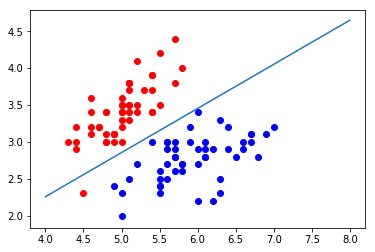

In [12]:
x1_plot = np.linspace(4,8,1000)
x2_plot = get_x2(x1_plot)

# 分类0的散点图
plt.scatter(X[y==0,0], X[y==0,1], color='red')

# 分类1的散点图
plt.scatter(X[y==1,0], X[y==1,1], color='blue')

# 这条就是决策边界
plt.plot(x1_plot, x2_plot)

plt.show()

唯一分类错误的那个红点应该是训练集，所以评分依然是1.0

训练集的

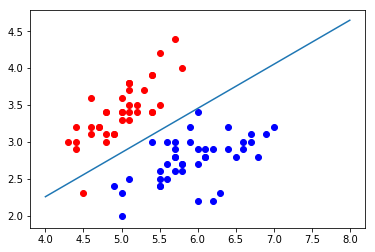

In [14]:
# 分类0的散点图
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='red')

# 分类1的散点图
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='blue')

# 这条就是决策边界
plt.plot(x1_plot, x2_plot)
plt.show()

测试集的

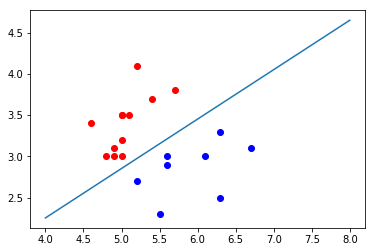

In [16]:
# 分类0的散点图
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color='red')

# 分类1的散点图
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color='blue')

# 这条就是决策边界
plt.plot(x1_plot, x2_plot)
plt.show()

## 不规则的决策边界的绘制方法  
每个像素点都判断一下其分类，然后给它标颜色

In [23]:
def plot_decision_boundary(model, axis):
    """绘制不规则决策边界"""
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1,-1)
    )
    X_new= np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/usr/local/seamonster/MachineLearningClassicAlgorithmEnv/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


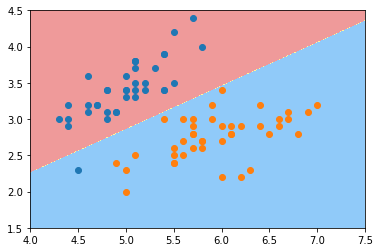

In [24]:
plot_decision_boundary(log_reg, axis=[4,7.5, 1.5, 4.5])
# 分类0的散点图
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1])

# 分类1的散点图
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1])

plt.show()

### kNN的决策边界

In [25]:
from sklearn.neighbors.classification import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
knn_clf.score(X_test, y_test)

1.0

/usr/local/seamonster/MachineLearningClassicAlgorithmEnv/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


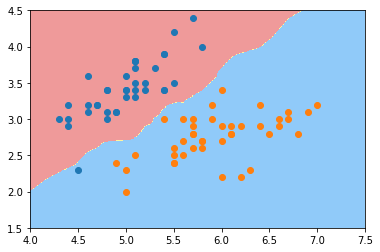

In [27]:
plot_decision_boundary(knn_clf, axis=[4,7.5, 1.5, 4.5])
# 分类0的散点图
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1])

# 分类1的散点图
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1])

plt.show()

/usr/local/seamonster/MachineLearningClassicAlgorithmEnv/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


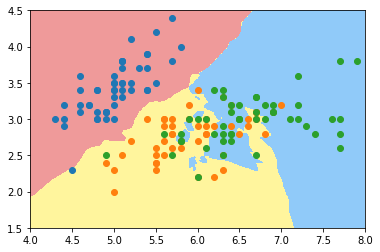

In [28]:
knn_clf_all = KNeighborsClassifier()

knn_clf_all.fit(iris.data[:,:2], iris.target)

plot_decision_boundary(knn_clf_all, axis=[4,8, 1.5, 4.5])

plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])

plt.show()

可以看到曲线过于曲折，（过拟合）

/usr/local/seamonster/MachineLearningClassicAlgorithmEnv/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


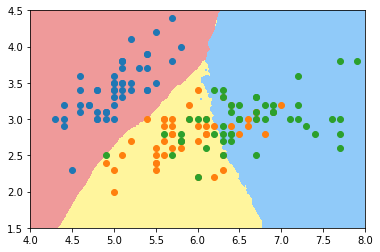

In [29]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)

knn_clf_all.fit(iris.data[:,:2], iris.target)

plot_decision_boundary(knn_clf_all, axis=[4,8, 1.5, 4.5])

plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])

plt.show()